# Advertising Sales Channel Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Importing required Modules

In [2]:
ad=pd.read_csv("sales_prediction.csv",index_col=[0])

Importing the dataset

In [3]:
ad.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Sample data of dataset

It is regression model

In [4]:
ad.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Datatypes of dataset, float datatypes for all columns

In [5]:
ad.shape

(200, 4)

Dataset have 200 rows and 4 columns

In [6]:
ad.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

Column names of our dataset

In [7]:
ad.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Statistical measures of dataset

# EDA

# Univariate Analysis

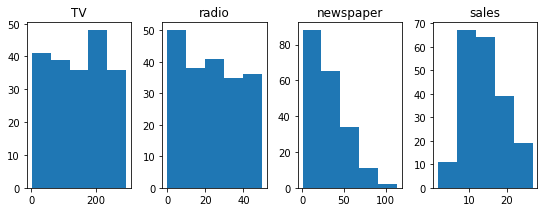

In [8]:
ad.hist(figsize=(14,7),layout=(2,6),bins=5,grid=False)
plt.show()

We can observe that some are normally distributed and some have skewed

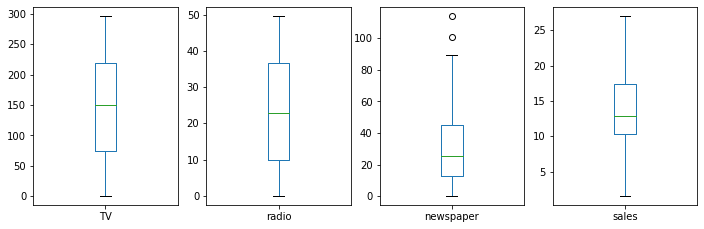

In [9]:
ad.plot(kind='box',layout=(2,5),figsize=(15,8),subplots=True)
plt.show()

Using boxplot we detect the outliers

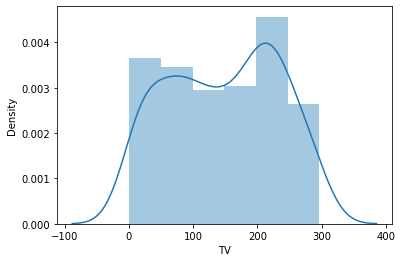

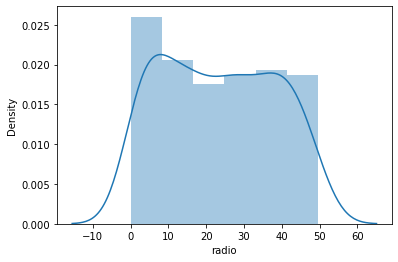

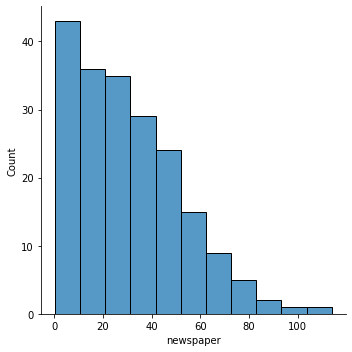

In [10]:
sns.distplot(ad['TV'])
plt.show()
sns.distplot(ad['radio'])
plt.show()
sns.displot(ad['newspaper'])
plt.show()

Datas are skewed

<Figure size 720x432 with 0 Axes>

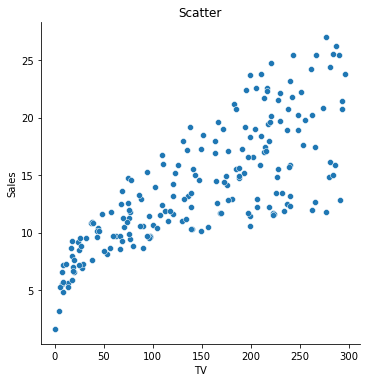

In [11]:
plt.figure(figsize=(10,6))
sns.relplot(x='TV',y='sales',data=ad)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Scatter")
plt.show()

We can observe that TV and Sales are positivey correlated

<Figure size 720x432 with 0 Axes>

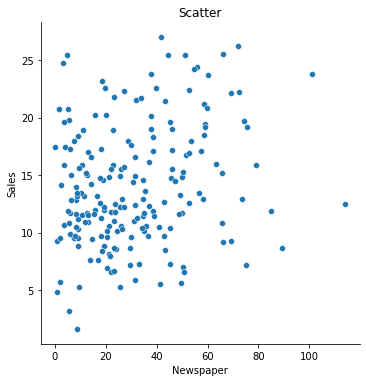

In [12]:
plt.figure(figsize=(10,6))
sns.relplot(x='newspaper',y='sales',data=ad)
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Scatter")
plt.show()

Points are scattered randomly,so we can say that newspaper not highly correlated to sales

<Figure size 720x432 with 0 Axes>

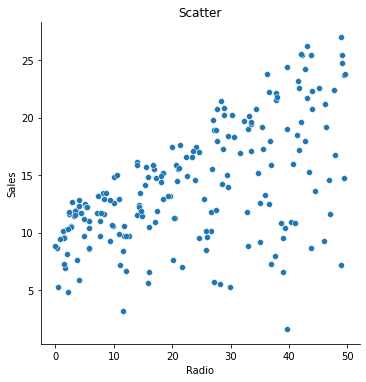

In [13]:
plt.figure(figsize=(10,6))
sns.relplot(x='radio',y='sales',data=ad)
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Scatter")
plt.show()

Radio and sales are correlated

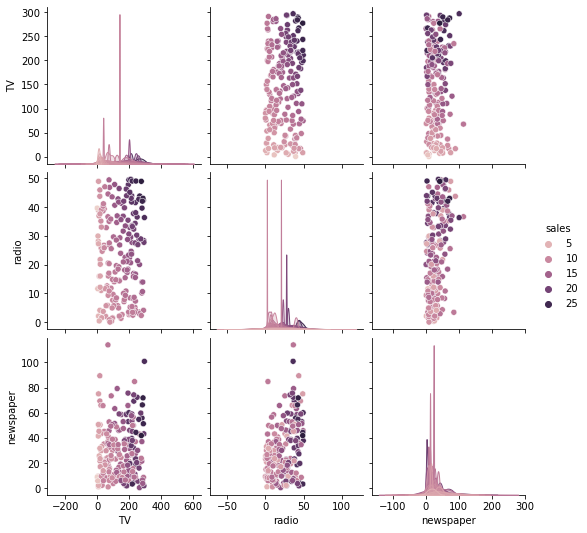

In [14]:
sns.pairplot(ad,hue='sales')
plt.show()

Multivariate analysis using pairplot

In [15]:
ad.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Correlation of dataset

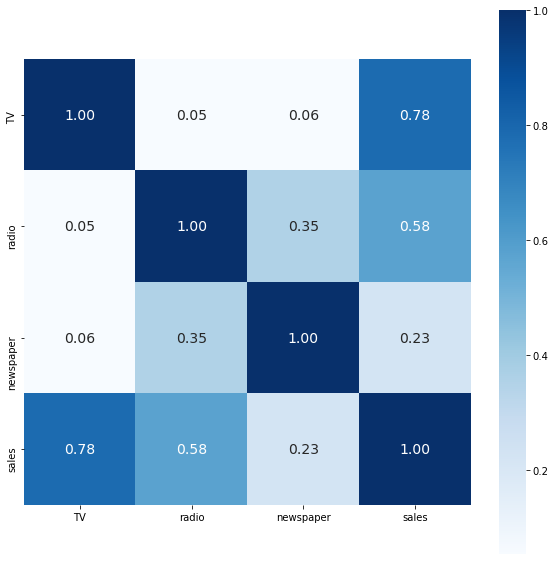

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(ad.corr(),cbar=True,square=True,annot=True,fmt='.2f',cmap='Blues',annot_kws={'size':14})
plt.show()

We can visually observe the correlation.newspaper least correlated to sales

In [17]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(ad))
advertise=ad[(z<3).all(axis=1)]

Removing outliers using zscore

In [18]:
advertise.shape

(198, 4)

we ave 198 rows and 4 columns after removing outliers

In [19]:
dataloss=((200-198)/200*100)
dataloss

1.0

 We have only 1% of data loss 

In [20]:
advertise.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

skewness is fine

In [21]:
x=advertise.drop('sales', axis = 1)
y = advertise['sales']

Seperated deatures and labels of dataset

In [22]:
x.head(6)

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
6,8.7,48.9,75.0


Sample data of our features

In [23]:
y.head(6)

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
6     7.2
Name: sales, dtype: float64

Sample data of labels

# Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

Scaled our features using standardscaler

In [25]:
x

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

# Model Building

In [26]:
#Decision Tree Regressor
dtr=DecisionTreeRegressor()

In [27]:
for i in range(0,110):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print(f"At random state {i},the training r2 score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2 score is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training r2 score is:- 1.0
At random state 0,the testing r2 score is:- 0.9561806088774326


At random state 1,the training r2 score is:- 1.0
At random state 1,the testing r2 score is:- 0.9570432185253044


At random state 2,the training r2 score is:- 1.0
At random state 2,the testing r2 score is:- 0.9518470505232354


At random state 3,the training r2 score is:- 1.0
At random state 3,the testing r2 score is:- 0.9533084273905039


At random state 4,the training r2 score is:- 1.0
At random state 4,the testing r2 score is:- 0.9273516287854213


At random state 5,the training r2 score is:- 1.0
At random state 5,the testing r2 score is:- 0.9550156279680188


At random state 6,the training r2 score is:- 1.0
At random state 6,the testing r2 score is:- 0.9424604141693605


At random state 7,the training r2 score is:- 1.0
At random state 7,the testing r2 score is:- 0.9618736555988862


At random state 8,the training r2 score is:- 1.0
At random state 8,the testing r2 score 

At random state 100,the training r2 score is:- 1.0
At random state 100,the testing r2 score is:- 0.9187948935048976


At random state 101,the training r2 score is:- 1.0
At random state 101,the testing r2 score is:- 0.9671525057067095


At random state 102,the training r2 score is:- 1.0
At random state 102,the testing r2 score is:- 0.9704663580685632


At random state 103,the training r2 score is:- 1.0
At random state 103,the testing r2 score is:- 0.9627087781063187


At random state 104,the training r2 score is:- 1.0
At random state 104,the testing r2 score is:- 0.930253788242602


At random state 105,the training r2 score is:- 1.0
At random state 105,the testing r2 score is:- 0.9321691720138362


At random state 106,the training r2 score is:- 1.0
At random state 106,the testing r2 score is:- 0.9660777332729632


At random state 107,the training r2 score is:- 1.0
At random state 107,the testing r2 score is:- 0.9731149145134462


At random state 108,the training r2 score is:- 1.0
At ran

Select Random state 74 least difference

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=74)
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2_d=r2_score(y_test,preddtr)
print(r2_d)

0.9752864631053879


Splitted testing and training model,fitted data,predicted and print r2_score

In [29]:
#linear regression
lr=LinearRegression()

In [30]:
for i in range(0,125):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training r2 score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2 score is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training r2 score is:- 0.8898322019518987
At random state 0,the testing r2 score is:- 0.9098946359000558


At random state 1,the training r2 score is:- 0.8946050839431845
At random state 1,the testing r2 score is:- 0.8912199077372979


At random state 2,the training r2 score is:- 0.9105689646648081
At random state 2,the testing r2 score is:- 0.8381266733637571


At random state 3,the training r2 score is:- 0.8944143192604463
At random state 3,the testing r2 score is:- 0.8980994665131538


At random state 4,the training r2 score is:- 0.8981805823414822
At random state 4,the testing r2 score is:- 0.8719021920124682


At random state 5,the training r2 score is:- 0.8994368014551729
At random state 5,the testing r2 score is:- 0.8616494043950313


At random state 6,the training r2 score is:- 0.8993028842288798
At random state 6,the testing r2 score is:- 0.8760639888444908


At random state 7,the training r2 score is:- 0.8907422790206732
At random state 7,the testing r2 

At random state 99,the training r2 score is:- 0.8832087051413472
At random state 99,the testing r2 score is:- 0.9300192208914474


At random state 100,the training r2 score is:- 0.9046635059559758
At random state 100,the testing r2 score is:- 0.8556177767066226


At random state 101,the training r2 score is:- 0.896513285553395
At random state 101,the testing r2 score is:- 0.8890481292310006


At random state 102,the training r2 score is:- 0.8894581821896649
At random state 102,the testing r2 score is:- 0.9086568406817325


At random state 103,the training r2 score is:- 0.9065205397658525
At random state 103,the testing r2 score is:- 0.8438689860800545


At random state 104,the training r2 score is:- 0.916287550749816
At random state 104,the testing r2 score is:- 0.7997245944130646


At random state 105,the training r2 score is:- 0.8950321402993681
At random state 105,the testing r2 score is:- 0.890479393338382


At random state 106,the training r2 score is:- 0.8915217930692438
At rando

 Selected random state 112 least difference

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=112)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
r2_lr=r2_score(y_test,predlr)
print(r2_lr)

0.8995075619548245


Splitted testing and training model,fitted data,predicted and print r2_score

In [32]:
#kneighbors
knn=KNeighborsRegressor()

In [33]:
for i in range(0,120):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9427357261045455
At random state 0,the testing accuracy is:- 0.9371640161588141


At random state 1,the training accuracy is:- 0.9589019518159241
At random state 1,the testing accuracy is:- 0.9634122130664954


At random state 2,the training accuracy is:- 0.9640754633864929
At random state 2,the testing accuracy is:- 0.9093693454581456


At random state 3,the training accuracy is:- 0.9526301506684561
At random state 3,the testing accuracy is:- 0.9520571334162591


At random state 4,the training accuracy is:- 0.9553186088785385
At random state 4,the testing accuracy is:- 0.9409095712873123


At random state 5,the training accuracy is:- 0.9649097173915784
At random state 5,the testing accuracy is:- 0.9015466707696829


At random state 6,the training accuracy is:- 0.95856790521984
At random state 6,the testing accuracy is:- 0.9320205944306065


At random state 7,the training accuracy is:- 0.9465693936169928
At random state 7,the testing accur

At random state 83,the training accuracy is:- 0.9568060237133249
At random state 83,the testing accuracy is:- 0.9069906621816142


At random state 84,the training accuracy is:- 0.9547307831421753
At random state 84,the testing accuracy is:- 0.9249031503296814


At random state 85,the training accuracy is:- 0.9577153189734031
At random state 85,the testing accuracy is:- 0.892738149379539


At random state 86,the training accuracy is:- 0.9498703552667345
At random state 86,the testing accuracy is:- 0.9348120543606236


At random state 87,the training accuracy is:- 0.9641773549860833
At random state 87,the testing accuracy is:- 0.9108481679107526


At random state 88,the training accuracy is:- 0.9544489148669623
At random state 88,the testing accuracy is:- 0.9430993126129614


At random state 89,the training accuracy is:- 0.9533114207539186
At random state 89,the testing accuracy is:- 0.9469923921883525


At random state 90,the training accuracy is:- 0.9569997322373832
At random state 90,

 selected random state 112 Least difference

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=112)
knn.fit(x_train,y_train)
predknn=lr.predict(x_test)
r2_kn=r2_score(y_test,predknn)
print(r2_kn)

0.8995075619548245


Splitted testing and training model,fitted data,predicted and print r2_score

In [35]:
#random forest regressor
rfr=RandomForestRegressor()

In [36]:
for i in range(0,120):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rfr.fit(x_train,y_train)
    pred_train=rfr.predict(x_train)
    pred_test=rfr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9955698268495904
At random state 0,the testing accuracy is:- 0.9775574929908016


At random state 1,the training accuracy is:- 0.9971167487758048
At random state 1,the testing accuracy is:- 0.9850677850604097


At random state 2,the training accuracy is:- 0.9972035930358936
At random state 2,the testing accuracy is:- 0.9709553529487351


At random state 3,the training accuracy is:- 0.9962902924355398
At random state 3,the testing accuracy is:- 0.977423865298676


At random state 4,the training accuracy is:- 0.9967365327422246
At random state 4,the testing accuracy is:- 0.9747727600532539


At random state 5,the training accuracy is:- 0.9964067347194773
At random state 5,the testing accuracy is:- 0.9811454449935926


At random state 6,the training accuracy is:- 0.9962311923367851
At random state 6,the testing accuracy is:- 0.9717201374068416


At random state 7,the training accuracy is:- 0.9961275561607063
At random state 7,the testing accu

At random state 63,the training accuracy is:- 0.9964482128235325
At random state 63,the testing accuracy is:- 0.9687607007469338


At random state 64,the training accuracy is:- 0.9963255954125702
At random state 64,the testing accuracy is:- 0.9804550166468552


At random state 65,the training accuracy is:- 0.9966932467669029
At random state 65,the testing accuracy is:- 0.9755458289410087


At random state 66,the training accuracy is:- 0.9969242842650342
At random state 66,the testing accuracy is:- 0.9768145101103778


At random state 67,the training accuracy is:- 0.9968677533861654
At random state 67,the testing accuracy is:- 0.9701831210515054


At random state 68,the training accuracy is:- 0.9966421781128938
At random state 68,the testing accuracy is:- 0.9721912881311817


At random state 69,the training accuracy is:- 0.9959674629785932
At random state 69,the testing accuracy is:- 0.9845432190822491


At random state 70,the training accuracy is:- 0.9963166649187386
At random state 70

selected random state 119, it has least difference

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=119)
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
r2_rf=r2_score(y_test,predrfr)
print(r2_rf)

0.9795204110770509


Splitted testing and training model,fitted data,predicted and print r2_score

# Cross Validation

In [38]:
print("CV score and it's mean of Decision Tree:",cross_val_score(dtr,x,y,cv=6).mean(),"r2 score:",r2_d)
print("CV score and it's mean of Linear Regression:",cross_val_score(lr,x,y,cv=6).mean(),"r2 score:",r2_lr)
print("CV score and it's mean of Knearest neghbors:",cross_val_score(knn,x,y,cv=6).mean(),"r2 score:",r2_kn)
print("CV score and it's mean of Random forest:",cross_val_score(rfr,x,y,cv=6).mean(),"r2 score:",r2_rf)

CV score and it's mean of Decision Tree: 0.9383146171949525 r2 score: 0.9752864631053879
CV score and it's mean of Linear Regression: 0.8868174285063072 r2 score: 0.8995075619548245
CV score and it's mean of Knearest neghbors: 0.9375638771472808 r2 score: 0.8995075619548245
CV score and it's mean of Random forest: 0.9768283352808084 r2 score: 0.9795204110770509


 We select Random forest regressor as our model because it shows least cv score and r2 score

# Hyper Parameter Tuning

In [39]:
parameter={'n_estimators':np.arange(100,140),'criterion':['squared_error','absolute_error','poisson'],
          'max_depth':np.arange(0,12),'min_samples_split':np.arange(0,4)}

Storing prameters

In [40]:
gv=GridSearchCV(rfr,parameter,cv=8)

Calling grid search cv

In [41]:
gv.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'min_samples_split': array([0, 1, 2, 3]),
                         'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139])})

Fitting training data

In [42]:
gv.best_params_

{'criterion': 'poisson',
 'max_depth': 11,
 'min_samples_split': 2,
 'n_estimators': 133}

Best parameters

In [43]:
best_mdel=RandomForestRegressor(criterion='poisson',max_depth=11,min_samples_split=2,n_estimators=133)
best_mdel.fit(x_train,y_train)
predbest=best_mdel.predict(x_test)
r2_best=r2_score(y_test,predbest)
print(r2_best*100)

72.98088230656984


Applying best parameters finding r2_score

In [44]:
yhat = best_mdel.predict(x)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.7698773636688993 0.7663187661998616


R squared and adjusted r squared

# Saving Model

In [45]:
import pickle
filename = 'advertise.pkl'
pickle.dump(rfr, open(filename, 'wb'))

# Conclusion

In [46]:
a=np.array(y_test)
predicted=np.array(rfr.predict(x_test))
ab_con=pd.DataFrame({"Original:":a,"predicted":predicted},index=range(len(a)))
ab_con

,Original:,predicted
0,22.3,22.131
1,9.6,10.189
2,19.6,18.449
3,20.8,20.970
4,14.4,14.194
5,10.3,10.596
6,18.4,18.987
7,11.6,12.221
8,22.6,21.925
9,17.3,18.217


Original and predicted values